<h1 dir=rtl align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
خونه جدید‌؟
</font>
</h1>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
در این تمرین می‌خواهیم به‌صورت عملی با نحوه‌ی پیاده‌سازی یک شبکه‌ی عصبی عمیق در <code>keras</code> آشنا شویم. کار خود را با خوانش داده‌ها و تحلیل اکتشافی آن شروع کرده، سپس با استفاده از پیش‌پردازش‌های مختلف، داده‌ها را به‌شکلی که مناسب استفاده در یک مدل یادگیری عمیق باشد آماده می‌کنیم و در نهایت به ساخت و آموزش یک شبکه‌ی عصبی می‌پردازیم. مجموعه‌داده‌ای که از آن استفاده خواهیم کرد شامل اطلاعاتی مربوط به حیوانات خانگی است. هدف این مسئله این است که پیش‌بینی کنیم آیا یک حیوان خانگی برای خود خانه‌ی جدیدی پیدا می‌کند یا خیر.
</font>
</p>

In [73]:
import numpy as np
import pandas as pd

In [74]:
import keras
print(keras.__version__)

3.0.5


In [75]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مجموعه‌داده
</font>
</h2>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
مشخصات ویژگی‌های مجموعه‌داده‌ای که در دسترس شما قرار گرفته در جداول زیر آمده است.
ابتدا مجموعه‌داده‌ی آموزشی و آزمون را از دو فایل <code>csv</code> موجود در پوشه‌ی تمرین بخوانید.
<br>
    توجه داشته‌باشد در مجموعه‌داده‌ی آزمون، ستون <code>AdoptionSpeed</code> وجود ندارد، زیرا در ادامه از این ستون برای ساخت متغیر هدف مسئله استفاده خواهیم کرد.
</font>
</p>


<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

|ستون|توضیحات|
|:------:|:---:|
|<code>Type</code>| نوع حیوان|
|<code>Age</code>| سن حیوان خانگی (به ماه) هنگام لیست شدن|
|<code>Breed1</code>|نژاد اصلی حیوان خانگی|
|<code>Gender</code>|جنسیت حیوان خانگی|
|<code>Color1</code>|رنگ اصلی حیوان خانگی|
|<code>Color2</code>|رنگ دوم حیوان خانگی (در صورت وجود)|
|<code>MaturitySize</code>|اندازه|
|<code>FurLength</code>|طول خز|
|<code>Vaccinated</code>|وضعیت واکسینه شدن|
|<code>Sterilized</code>|وضعیت انگل‌زدایی شدن|
|<code>Health</code>|وضعیت سلامتی|
|<code>Fee</code>|هزینه|
|<code>Description</code>|توضیحات|
|<code>PhotoAmt</code>|تعداد عکس بارگذاری شده|
|<code>AdoptionSpeed</code>|سرعت پذیرش (توضیح این اعداد در ادامه آمده است)|

<br>

|توضیحات|سرعت پذیرش|
|:------:|:---:|
|حیوان خانگی در همان روزی که لیست شده به سرپرستی پذیرفته شد.|<code>0</code>|
|	حیوان خانگی بین ۱ تا ۷ روز (هفته اول) پس از لیست شدن به سرپرستی پذیرفته شد.|<code>1</code>|
|حیوان خانگی بین ۸ تا ۳۰ روز (ماه اول) پس از لیست شدن به سرپرستی پذیرفته شد.|<code>2</code>|
|حیوان خانگی بین ۳۱ تا ۹۰ روز (ماه دوم و سوم) پس از لیست شدن به سرپرستی پذیرفته شد.|<code>3</code>|
|پس از ۱۰۰ روز لیست شدن، حیوان خانگی به سرپرستی پذیرفته نشد.|<code>4</code>|

</font>
</div>
</center>

In [76]:
# Load the train and test data
train = pd.read_csv("./data/petfinder_train.csv") # TODO
test = pd.read_csv("./data/petfinder_test.csv")     # TODO

In [77]:
train.head()

,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Fee,Description,PhotoAmt,AdoptionSpeed
0,Cat,3,Tabby,Male,Black,White,Small,Short,No,No,Healthy,100,Nibble is a 3+ month old ball of cuteness. He ...,1,2
1,Cat,1,Domestic Medium Hair,Male,Black,Brown,Medium,Medium,Not Sure,Not Sure,Healthy,0,I just found it alone yesterday near my apartm...,2,0
2,Dog,1,Mixed Breed,Male,Brown,White,Medium,Medium,Yes,No,Healthy,0,Their pregnant mother was dumped by her irresp...,7,3
3,Dog,4,Mixed Breed,Female,Black,Brown,Medium,Short,Yes,No,Healthy,150,"Good guard dog, very alert, active, obedience ...",8,2
4,Dog,1,Mixed Breed,Male,Black,No Color,Medium,Short,No,No,Healthy,0,This handsome yet cute boy is up for adoption....,3,2


In [78]:
test.head()

,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Fee,Description,PhotoAmt
0,Dog,2,Rottweiler,Female,Black,No Color,Medium,Short,No,No,Healthy,0,"Jojo is cute, playful and addorable! Only seri...",1
1,Cat,12,Siamese,Female,Brown,Golden,Medium,Medium,Not Sure,Not Sure,Minor Injury,0,"Achik was adopted one year ago, that time she ...",1
2,Cat,3,Domestic Short Hair,Female,Black,White,Small,Short,No,No,Healthy,0,"Sabby loves to eat, sleep, play and repeat. Oh...",2
3,Dog,2,Mixed Breed,Female,Cream,No Color,Medium,Medium,Yes,No,Healthy,0,She was rescued together with her other 4 sibl...,5
4,Dog,12,Mixed Breed,Female,White,No Color,Medium,Long,Not Sure,Not Sure,Healthy,0,I found this dog infront of my office. It look...,2


In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10537 entries, 0 to 10536
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Type           10537 non-null  object
 1   Age            10537 non-null  int64 
 2   Breed1         10537 non-null  object
 3   Gender         10537 non-null  object
 4   Color1         10537 non-null  object
 5   Color2         10537 non-null  object
 6   MaturitySize   10537 non-null  object
 7   FurLength      10537 non-null  object
 8   Vaccinated     10537 non-null  object
 9   Sterilized     10537 non-null  object
 10  Health         10537 non-null  object
 11  Fee            10537 non-null  int64 
 12  Description    10528 non-null  object
 13  PhotoAmt       10537 non-null  int64 
 14  AdoptionSpeed  10537 non-null  int64 
dtypes: int64(4), object(11)
memory usage: 1.2+ MB


In [80]:
#we plot the data to see the breed distribution
import matplotlib.pyplot as plt
import seaborn as sns

distribution = train.groupby('Breed1')["Target"].mean()
sns.barplot(x=distribution.index, y=distribution.values)

KeyError: 'Column not found: Target'

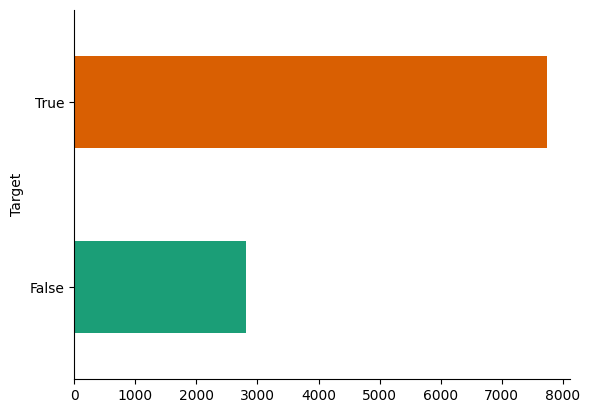

In [ ]:
#we plot the data based on the target to see if the dataset is balanced
from matplotlib import pyplot as plt
import seaborn as sns
train.groupby('Target').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
#looks like we have a balanced dataset

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیش‌پردازش داده‌ها
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
همان‌طور که می‌دانید قبل از ساخت و آموزش مدل، برای آن‌که داده‌ها مناسب ورودی دادن به مدل باشند معمولاً نیاز است تغیراتی را بر روی مجموعه‌داده اعمال کنیم. گام نخست در پیش‌پردازش داده‌ها، بررسی مقادیر گم‌شده در مجموعه‌داده است که طبق خروجی سلول قبل مشاهده کردیم در این مجموعه‌داده، داده‌ی گم‌شده نداریم، بنابراین به سراغ گام‌های بعدی می‌رویم.
</font>
</p>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
<span style="color:red"><b>توجه:</b></span> جهت بررسی پیش‌پردازش انجام‌شده‌ بر روی مجموعه‌داده، دیتافرم <code>test</code> نیز مورد بررسی قرار خواهد گرفت، بنابراین لطفاً پیش‌پردازش یا تغییری بیشتر از آن‌چه از شما خواسته شده انجام ندهید.
</font>
</p>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
    <ul dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
همان‌طور که گفتیم هدف این مسئله، پیش‌بینی پذیرش یا عدم پذیرش حیوان خانگی است، بنابراین باید در مجموعه‌داده‌‌ها یک ستون جدید با اسم <code>Target</code> اضافه کنیم تا از آن به‌عنوان متغیر هدف مسئله استفاده کنیم. مقادیر این ستون تنها در صورتی <code>True</code> است که حیوان خانگی پذیرش شده باشد. در این مرحله با استفاده ستون <code>AdoptionSpeed</code> ستون <code>Target</code> را ایجاد کنید.
<br>
به‌عنوان راهنمایی می‌توانید از دستور <code>np.where</code> استفاده کنید. البته توجه کنید که راه‌های متنوعی برای انجام این کار وجود دارد.
</font>
</p>




In [81]:
train['Target'] = np.where(train["AdoptionSpeed"] > 3, False, True) # TODO

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
    <ul dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
حال می‌توانیم ستون‌هایی که به آن‌ها نیاز نداریم را از دیتافریم حذف کنیم. با توجه به این‌که ستون <code>AdoptionSpeed</code> را به ستون <code>Target</code> تبدیل کردیم، این ستون را حذف می‌کنیم، همچنین در ستون <code>Description</code> اطلاعات متنی داریم که روش پردازش و کار با این نوع داده‌ها را در فصل‌های بعدی بررسی خواهیم کرد، بنابراین این ستون را نیز حذف می‌کنیم.
</font>
</p>



In [82]:
train.drop(columns = ["Description", "AdoptionSpeed"], inplace = True) # TODO
test.drop(columns = ["Description"], inplace = True) # TODO

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
    <ul dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
در گام بعد به‌سراغ ویژگی‌های دسته‌ای می‌رویم. ابتدا مجدد نگاهی به جزئیات دیتافریم بی‌اندازیم.
</font>
</p>



In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10537 entries, 0 to 10536
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Type          10537 non-null  object
 1   Age           10537 non-null  int64 
 2   Breed1        10537 non-null  object
 3   Gender        10537 non-null  object
 4   Color1        10537 non-null  object
 5   Color2        10537 non-null  object
 6   MaturitySize  10537 non-null  object
 7   FurLength     10537 non-null  object
 8   Vaccinated    10537 non-null  object
 9   Sterilized    10537 non-null  object
 10  Health        10537 non-null  object
 11  Fee           10537 non-null  int64 
 12  PhotoAmt      10537 non-null  int64 
 13  Target        10537 non-null  bool  
dtypes: bool(1), int64(3), object(10)
memory usage: 1.1+ MB


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
    <ul dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
در خروجی قطعه‌کد بالا می توان دید که ستون‌های
   <code>Fee</code>، <code>PhotoAmt</code> و <code>Age</code> مقادیر عددی دارند و برای باقی ستون‌های مجموعه‌داده نیاز است، پیش‌پردازش لازم برای تبدیل آن‌ها به مقادیر عددی را انجام دهیم. پس به بررسی تعداد دسته‌های هر ویژگی و نوع آن‌ها می‌پردازیم
</font>
</p>


In [84]:
for column in ["Type", "Breed1", "Gender", "Color1", "Color2", "MaturitySize", "FurLength", "Vaccinated", "Sterilized", "Health"]:
    print("column:", column, "unique_values:", len(train[column].unique()))

column: Type unique_values: 2
column: Breed1 unique_values: 165
column: Gender unique_values: 2
column: Color1 unique_values: 7
column: Color2 unique_values: 7
column: MaturitySize unique_values: 3
column: FurLength unique_values: 3
column: Vaccinated unique_values: 3
column: Sterilized unique_values: 3
column: Health unique_values: 3


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
    <ul dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
 می‌دانیم ستون‌های <code>Health</code>، <code>FurLength</code> و <code>MaturitySize</code> از جنس متغیر‌های دسته‌ای ترتیبی هستند به این معنی که ترتیب خاصی بین مقادیر گروه‌ها وجود دارند. بنابراین می‌توانیم با استفاده از تابع <code>LabelEncoder</code> در کتابخانه‌ی <code>sklearn</code> به‌سادگی و بی‌دغدغه آن‌ها را به داده‌های عددی تبدیل کنیم.
</font>
</p>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
<span style="color:red"><b>توجه:</b></span> پیش‌پردازش‌هایی که بر روی نمونه‌های اعتبارسنجی/آزمون اعمال می‌کنید باید طبق آمارها یا اطلاعاتی باشد که از روی نمونه‌های آموزشی به دست آمده است. به‌عنوان مثال اگر می‌خواهید مقادیر گم‌شده‌ی یک ویژگی را با میانگین آن ویژگی پُر کنید، باید از میانگینی که طبق نمونه‌های آموزشی محاسبه‌شده استفاده کنید. به همین دلیل، در کدگذاری نیز برای نمونه‌های اعتبارسنجی/آزمون باید از تابع <code dir=ltr>transform()</code> به‌جای <code dir=ltr>fit_transform()</code> استفاده کنید.
</font>
</p>

In [85]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train['MaturitySize'] = le.fit_transform(train['MaturitySize']) # TODO
test['MaturitySize'] = le.transform(test['MaturitySize']) # TODO

train['FurLength'] = le.fit_transform(train['FurLength']) # TODO
test['FurLength'] = le.transform(test['FurLength']) # TODO

train['Health'] = le.fit_transform(train['Health']) # TODO
test['Health'] = le.transform(test['Health']) # TODO

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
    <ul dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
اما ستون‌های <code>Type</code>، <code>Breed1</code>، <code>Gender</code>، <code>Color1</code> ،<code>Color2</code> <code>Vaccinated</code> و <code>Sterilized</code>  از جنس متغیر‌های دسته‌ای اسمی هستند، به این معنی که ترتیب خاصی بین مقادیر گروه‌ها وجود ندارد. بنابراین برای این ویژگی‌ها نمی‌توانیم از <code>LabelEncoder</code> استفاده کنیم، زیرا این نوع داده‌ها از نظر ترتیبی تفاوتی با یک‌دیگر ندارند و اگر به‌سادگی به هر کدام از این ویژگی‌ها یک عدد اختصاص دهیم آن‌گاه به‌نوعی بین آن‌ها ترتیب قائل شدیم که نادرست است. برای حل این مسئله از روش کدگذاری دودویی استفاده می‌کنیم، به این معنی که به‌طور مثال به ازای ستون <code>color1</code> که ۷ مقدار یکتا <code dir=ltr>['Black', 'Brown', 'Cream', 'Gray', 'Golden', 'White', 'Yellow']</code> را دارد ۳ ستون اضافه می‌کنیم زیرا در هر ستون می‌توانیم مقدار ۱ و ۰ داشته باشیم و برای این‌که ۷ دسته را پوشش دهیم حداقل به ۳ ستون نیاز داریم (<code dir=ltr>7 < 3^2</code>). حال به هرکدام از این دسته‌ها عددی اختصاص می‌دهیم و ستون‌های مربوط به کد دودویی آن عدد را پر می‌کنیم.
<br>
    تابع <code>BinaryEncoder</code> از کتابخانه‌ی <code>category_encoders</code> این عملیات را انجام می‌دهد.
        <br>
    توجه داشته باشید در ستون <code>Gender</code> و <code>Type</code> به علت این‌که فقط ۲ دسته داریم می‌توانیم با تابع <code>LabelEncoder</code> تبدیل را انجام دهیم.
    </font>
</p>

In [86]:
train['Type'] = le.fit_transform(train['Type']) # TODO
test['Type'] = le.transform(test['Type']) # TODO

train['Gender'] = le.fit_transform(train['Gender']) # TODO
test['Gender'] = le.transform(test['Gender']) # TODO

In [87]:
import category_encoders as ce

binary_encoder = ce.BinaryEncoder()

train_binary_Breed1 = binary_encoder.fit_transform(train['Breed1']) # TODO
test_binary_Breed1 = binary_encoder.transform(test['Breed1']) # TODO

train_binary_Color1 = binary_encoder.fit_transform(train['Color1']) # TODO
test_binary_Color1 = binary_encoder.transform(test['Color1']) # TODO

train_binary_Color2 = binary_encoder.fit_transform(train['Color2']) # TODO
test_binary_Color2 = binary_encoder.transform(test['Color2']) # TODO

train_binary_Vaccinated = binary_encoder.fit_transform(train['Vaccinated']) # TODO
test_binary_Vaccinated = binary_encoder.transform(test['Vaccinated']) # TODO

train_binary_Sterilized = binary_encoder.fit_transform(train['Sterilized']) # TODO
test_binary_Sterilized = binary_encoder.transform(test['Sterilized']) # TODO

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
    <ul dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
حال ستون‌های ساخته شده برای هر متغیر را به مجموعه‌داده اصلی اضافه می‌کنیم و این ستون‌ها را حذف می‌کنیم.
</font>
</p>

In [88]:
train = pd.concat([train, train_binary_Breed1, train_binary_Color1, train_binary_Color2, train_binary_Vaccinated, train_binary_Sterilized], axis=1)
columns = ['Breed1','Color1','Color2','Vaccinated','Sterilized']
train.drop(columns = columns, inplace = True)

test = pd.concat([test, test_binary_Breed1, test_binary_Color1, test_binary_Color2, test_binary_Vaccinated, test_binary_Sterilized], axis=1)
columns = ['Breed1','Color1','Color2','Vaccinated','Sterilized']
test.drop(columns = columns, inplace = True)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10537 entries, 0 to 10536
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Type          10537 non-null  int32
 1   Age           10537 non-null  int64
 2   Gender        10537 non-null  int32
 3   MaturitySize  10537 non-null  int32
 4   FurLength     10537 non-null  int32
 5   Health        10537 non-null  int32
 6   Fee           10537 non-null  int64
 7   PhotoAmt      10537 non-null  int64
 8   Target        10537 non-null  bool 
 9   Breed1_0      10537 non-null  int64
 10  Breed1_1      10537 non-null  int64
 11  Breed1_2      10537 non-null  int64
 12  Breed1_3      10537 non-null  int64
 13  Breed1_4      10537 non-null  int64
 14  Breed1_5      10537 non-null  int64
 15  Breed1_6      10537 non-null  int64
 16  Breed1_7      10537 non-null  int64
 17  Color1_0      10537 non-null  int64
 18  Color1_1      10537 non-null  int64
 19  Color1_2      10537 non-n

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
    <ul dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
همان‌طور که در درسنامه‌های قبلی گفتیم برای ارزیابی و بهبود مدل بخشی از داده‌های آموزش را به‌عنوان داده‌های اعتبارسنجی جدا می‌کنیم. برای این‌کار می‌توانید از تابع <code>train_test_split</code> کتابخانه‌ی <code>sklearn</code> استفاده کنید. مستندات این تابع را می‌توانید در  <a href=https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html> این لینک </a> پیدا کنید. توجه داشته باشید در این مسئله <code>0.1</code> از داده‌های آموزش را به داده‌های اعتبارسنجی اختصاص می‌دهیم و <code>0.9</code> باقی مانده را برای آموزش مدل استفاده می‌کنیم.

</font>
</p>




In [96]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train.drop(columns = ['Target']).values, train['Target'].values, test_size=0.1, random_state=42) # TODO

print('Train examples:', len(X_train), len(y_train))
print('Validation examples:', len(X_valid), len(y_valid))
print('Test examples:',  len(test))

Train examples: 9483 9483
Validation examples: 1054 1054
Test examples: 1000


In [97]:
X_valid.shape

(1054, 26)

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
ساخت شبکه‌ی عصبی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
پس از انجام پیش‌پرداز‌های مورد نیاز نوبت به ساخت و آموزش مدل رسیده است.
در این مسئله از شما می‌خواهیم ابتدا یک لایه ورودی با ابعاد مناسب مسئله که همان تعداد ویژگی‌های مجموعه‌داده است بسازید. سپس ۳ لایه‌ی متراکم با تعداد نورون‌های ۵۰۰۰، ۱۰۰۰ و ۵۰۰ (به ترتیب از راست به چپ) با تابع‌ فعال‌ساز  <code>relu</code> ایجاد کنید و در نهایت یک لایه‌ی متراکم خروجی با تعداد نورون مناسب و تابع فعال‌ساز  <code>softmax</code> اضافه کنید.
</font>
</p>

In [98]:
keras.backend.clear_session()
model = keras.models.Sequential() # TODO : define a Sequential model
model.add(keras.layers.Input(shape=(26, ))) # TODO : add Input Layer with proper Shape
model.add(keras.layers.Dense(units=5000, activation="relu")) # TODO : add Dense Layer with 5000 neurons and relu activation function
model.add(keras.layers.Dense(units=1000, activation="relu")) # TODO : add Dense Layer with 1000 neurons and relu activation function
model.add(keras.layers.Dense(units=500, activation="relu")) # TODO : add Dense Layer with 500 neurons and relu activation function
model.add(keras.layers.Dense(units=1, activation="sigmoid")) # TODO : add Dense Layer as Output Layer with sigmoid activation function


In [99]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5000)           │       135,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1000)           │     5,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           501 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,637,001 (21.50 MB)

 Trainable params: 5,637,001 (21.50 MB)

 Non-trainable params: 0 (0.00 B)

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
آموزش شبکه‌ی عصبی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
    <ul dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
در ادامه شبکه را با تابع هزینه و بهینه‌ساز تعریف‌شده <code>compile</code> می‌کنیم. (درباره‌ی توابع هزینه‌ و بهینه‌سازهای مختلف در فصل بعد کامل صحبت خواهیم کرد)</font>
</p>

In [100]:
model.compile(optimizer = 'adam',
              loss = keras.losses.BinaryCrossentropy(from_logits=False),
              metrics = ['accuracy'])

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
    <ul dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
در این مرحله باید مدل ساخته شده را با اندازه‌ی دسته ۱۲۸ (<code>BATCH_SIZE</code>) و به تعداد دور ۱۰ (<code>epochs</code>) آموزش دهید.
</font>
</p>




In [101]:
epochs = 10 # TODO
BATCH_SIZE = 128 # TODO

history = model.fit(X_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=epochs,
                    validation_data=(X_valid, y_valid)) # TODO


Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - accuracy: 0.6753 - loss: 1.2058 - val_accuracy: 0.7258 - val_loss: 0.5446
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - accuracy: 0.7241 - loss: 0.5544 - val_accuracy: 0.7372 - val_loss: 0.5434
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - accuracy: 0.7335 - loss: 0.5278 - val_accuracy: 0.7353 - val_loss: 0.5243
Epoch 4/10
14/75 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - accuracy: 0.7668 - loss: 0.4799

75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.7539 - loss: 0.5020 - val_accuracy: 0.7059 - val_loss: 0.5352
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - accuracy: 0.7442 - loss: 0.5191 - val_accuracy: 0.7448 - val_loss: 0.5154
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - accuracy: 0.7563 - loss: 0.5082 - val_accuracy: 0.7419 - val_loss: 0.5094
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.7567 - loss: 0.5114 - val_accuracy: 0.7400 - val_loss: 0.5194
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - accuracy: 0.7567 - loss: 0.4966 - val_accuracy: 0.7362 - val_loss: 0.5080
Epoch 9/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - accuracy: 0.7552 - loss: 0.5021 - val_accuracy: 0.7486 - val_loss: 0.5193
Epoch 10/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - accuracy: 0.7604 - loss: 0.4959 - val_accuracy: 0.7448 - val_loss: 0.5104



<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیش‌بینی برای داده‌های آزمون و خروجی
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
شبکه‌ی خود را روی مجموعه‌داده‌ی <code>test</code>  آزمایش کنید و خروجی را در یک دیتافریم (<code>dataframe</code>) ذخیره کنید. دقت کنید مقادیر مجاز مقادیر دودویی (<code>False</code>/<code>True</code>) می‌باشد.</font>
توجه داشته باشید در این تمرین صحت مدل شما برسی می‌شود. همچنین مدل شما باید بعد از یادگیری به دقت بیش از <span style="color:red">۶۹ درصد</span> بر روی داده‌ی آزمون برسد تا بتوانید امتیاز این‌ تمرین را دریافت کنید.
</font>
</p>


<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
  
|ستون|توضیحات|
|:------:|:---:|
|<code>Target</code>|آیا حیوان‌خانگی خانه جدید پیدا کرده است یا خیر|
  
</font>
</div>
</center>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    اسم دیتافریم باید <code>submission</code> باشد؛ در غیر این صورت، سامانه داوری نمی‌تواند تلاش‌ شما را ارزیابی کند.
    <br>
    این دیتافریم تنها شامل ۱ ستون با اسم <code>Target</code> است و ۱۰۰۰۰ سطر دارد.
    <br>
    به ازای هر سطر موجود در دیتافریم <code>test</code> شما باید یک مقدار پیش‌بینی‌شده داشته باشید.
    <br>
    جدول زیر، ۵ سطر ابتدایی دیتافریم <code>submission</code> را نشان می‌دهد. البته در جواب شما، اعداد ستون <code>Target</code> ممکن است متفاوت باشد و این فقط یک مثال است.
</font>
</p>

<center>
<div dir=ltr style="direction: ltr;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
||<code>Target</code>|
|:----:|:-----:|
|0|<code>True</code>|
|1|<code>True</code>|
|2|<code>False</code>|
|3|<code>False</code>|
|4|<code>True</code>|

</font>
</div>
</center>

In [102]:
from sklearn.metrics import confusion_matrix, classification_report

prediction = model.predict(X_valid) # TODO
prediction.reshape(-1)
print(classification_report(y_valid, np.where(prediction.reshape(-1) > 0.5, True, False)))

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

       False       0.55      0.27      0.36       284
        True       0.77      0.92      0.84       770

    accuracy                           0.74      1054
   macro avg       0.66      0.59      0.60      1054
weighted avg       0.71      0.74      0.71      1054



In [ ]:
prediction = model.predict(test.values) # TODO
prediction.reshape(-1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


array([[0.8754639 ],
       [0.6578932 ],
       [0.681392  ],
       [0.9185275 ],
       [0.58716106],
       [0.57418776],
       [0.85463333],
       [0.9241941 ],
       [0.64386415],
       [0.73863924],
       [0.8543875 ],
       [0.84022814],
       [0.73932713],
       [0.8699971 ],
       [0.43990305],
       [0.71552706],
       [0.5606451 ],
       [0.7372439 ],
       [0.6425063 ],
       [0.8815373 ],
       [0.5420294 ],
       [0.7887608 ],
       [0.90585643],
       [0.5707114 ],
       [0.7334408 ],
       [0.9526533 ],
       [0.96413684],
       [0.9100406 ],
       [0.48727638],
       [0.8027861 ],
       [0.591779  ],
       [0.96815425],
       [0.6612708 ],
       [0.88798946],
       [0.5666679 ],
       [0.7344529 ],
       [0.57383424],
       [0.7205069 ],
       [0.9378427 ],
       [0.63139844],
       [0.8237842 ],
       [0.5773363 ],
       [0.884475  ],
       [0.66888213],
       [0.94638664],
       [0.75879526],
       [0.7314567 ],
       [0.868

In [ ]:
submission = pd.DataFrame(
    {"Target" : np.where(prediction.reshape(-1) > 0.5, True, False)}) # TODO

In [ ]:
submission

,Target
0,True
1,True
2,True
3,True
4,True
...,...
995,True
996,True
997,True
998,True


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد. همچنین اگر از گوگل کولب استفاده می‌کنید، در صورت نیاز به پشتیبانی حتماً آخرین نسخه از نت‌بوک را به‌صورت دستی دانلود کرده و داخل فایل ارسالی قرار دهید یا لینک کولب را با ما به‌اشتراک بگذارید.
</font>
</p>

In [ ]:
import zipfile
import joblib
import numpy as np
import json
import os

if not os.path.exists(os.path.join(os.getcwd(), 'new_home.ipynb')):
    %notebook -e new_home.ipynb

test.to_csv("test.csv")

model_info=[]
for layer in model.layers:
  if layer.__class__.__name__=="Dense":
    model_info.append({
        "name": layer.__class__.__name__,
        "units":layer.units,
        "activation":layer.get_config()["activation"]
    })
  else:
    model_info.append({"name": layer.__class__.__name__})

with open("model_info.json", "w") as f:
    json.dump(model_info, f)


def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

submission.to_csv('submission.csv', index=False)

file_names = ["test.csv",'submission.csv', 'model_info.json', 'new_home.ipynb']
compress(file_names)

File Paths:
['test.csv', 'submission.csv', 'model_info.json', 'new_home.ipynb']
